In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:, :]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["MacBook", "New iPhone", "Apple Music", "layoff", "Microsoft", "Inflation",\
            "Restaurants", "Sports", "Kanye West"]
            # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
df

,MacBook,New iPhone,Apple Music,layoff,Microsoft,Inflation,Restaurants,Sports,Kanye West
date,,,,,,,,,
2004-01-01,0,0,10,21,93,48,53,91,7
2004-02-01,0,0,7,16,96,43,60,87,11
2004-03-01,0,0,7,16,90,50,50,92,13
2004-04-01,0,0,7,17,91,49,49,85,14
2004-05-01,0,0,6,17,100,42,45,83,13
...,...,...,...,...,...,...,...,...,...
2023-09-01,84,44,54,20,27,65,64,70,14
2023-10-01,81,29,52,22,27,65,61,66,11
2023-11-01,87,27,76,21,26,58,58,64,8


In [10]:
df = df.resample("Q").mean()

In [11]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [15]:
#y_scaled

In [16]:
#X_scaled

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.


In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso = Lasso(alpha=0.5)

In [19]:
lasso.fit(X_scaled, y_scaled)

Lasso(alpha=0.5)

In [20]:
coefficients = lasso.coef_

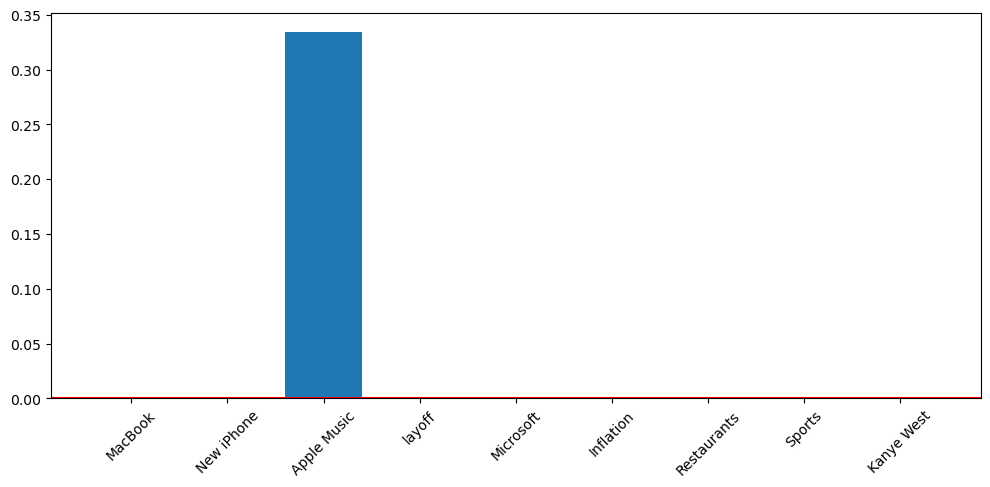

In [21]:
plt.figure(figsize = (12,5))
plt.bar(X.columns, coefficients)
plt.axhline(0, color = "red")
plt.xticks(rotation=45)
plt.show()

# 5.) Do these coefficient magnitudes make sense?

In this case, when lambda = 0.5, "Apple Music" appears to be the most important feature, and all the other estimators shrink to zero. However, I also normalized y values in the Lasso model. Otherwise, all estimators shrink to zero. I think it makes sense that the search results for Apple Music is important for predicting Apple's EPS. However, I also expected that "MacBook" and "New iPhone" had higher magnitude.